In [36]:
import datasets
from classix_m import CLASSIX_M
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
# data = fetch_ucirepo(name='iris')
import cv2 as cv
import time
import PIL
from PIL import Image
import umap
from classix_m import CLASSIX_M
from classix_t import CLASSIX_T
from matplotlib import pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari

In [37]:
data = fetch_ucirepo(name='iris')
data.data.features = data.data.features.dropna()
np.unique(np.array(data.data.targets).T[0])
x = np.array(data.data.features)
y = np.array(data.data.targets).T[0]
dis = {k:v for v,k in enumerate(np.unique(y))}
dis
labels = np.array([dis[i] for i in y])

In [38]:
x = umap.UMAP(n_components=2, metric='manhattan').fit_transform(x)


OWN AGGREGATION


100%|██████████| 150/150 [00:00<00:00, 12760.54it/s]


  aggregation time: 0.029312849044799805
  search time: 0.00024247169494628906
  ips time: 0.0041577816009521484


100%|██████████| 41/41 [00:00<00:00, 26448.24it/s]


  merging time: 0.0033159255981445312
 minPts Merging
small clusters [2 5 6 7 8]


100%|██████████| 5/5 [00:00<00:00, 28767.52it/s]

final cluster sizes [48. 17. 35. 50.]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 0 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
time:  0.0363311767578125


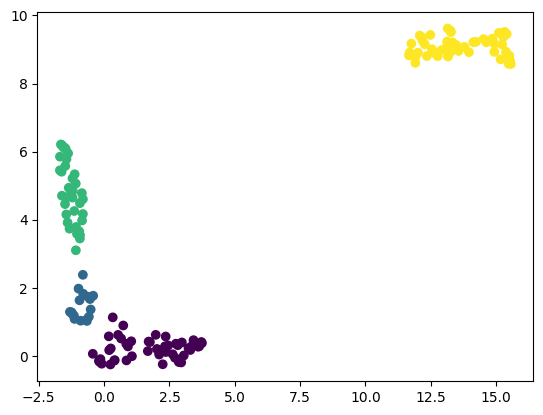

silhouette_score classix_m:  0.65267
silhouette_score iris_gt:  0.6500257


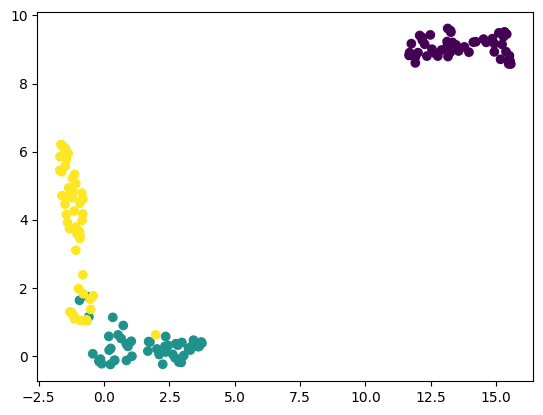

In [100]:
clx_m = CLASSIX_M(radius=0.1, minPts=15, mergeScale=1.5)
st = time.time()
clx_m.fit(x)
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=clx_m.labels)
plt.show()
plt.savefig("iris.svg", format='svg')
plt.clf()
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.savefig("iris_gt.svg", format='svg')
print("silhouette_score classix_m: ", silhouette_score(x, clx_m.labels))
print("silhouette_score iris_gt: ", silhouette_score(x, labels))

In [53]:
clx_m.labels.dtype
# labels.dtype

dtype('int64')

time:  0.008336067199707031


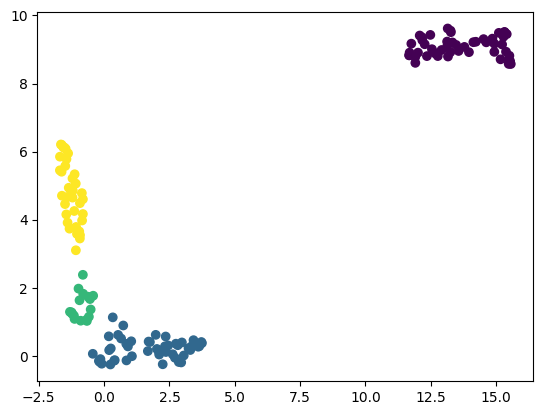

silhouette_score dbscan:  0.65267


<Figure size 640x480 with 0 Axes>

In [ ]:
db = DBSCAN(eps=1, min_samples=10, metric='manhattan')
st = time.time()
db.fit(x)
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=db.labels_)
plt.show()
plt.savefig("iris_db.svg", format='svg')
print("silhouette_score dbscan: ", silhouette_score(x, db.labels_))
plt.clf()

time:  0.05002403259277344


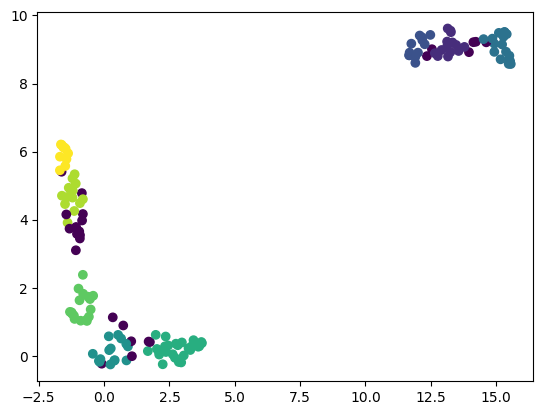

silhouette_score optics:  0.39091396


<Figure size 640x480 with 0 Axes>

In [ ]:
op = OPTICS(max_eps = 2, min_samples=10, metric='manhattan')
st = time.time()
op.fit(x)
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=op.labels_)
plt.show()
plt.savefig("iris_op.svg", format='svg')
print("silhouette_score optics: ", silhouette_score(x, op.labels_))
plt.clf()

In [101]:
print("ari classix_m: ", ari(labels, clx_m.labels))
print("ari dbscan: ", ari(labels, db.labels_))
print("ari optics: ", ari(labels, op.labels_))

ari classix_m:  0.8374412471146712
ari dbscan:  0.8374412471146712
ari optics:  0.29459584506307995


<Figure size 640x480 with 0 Axes>

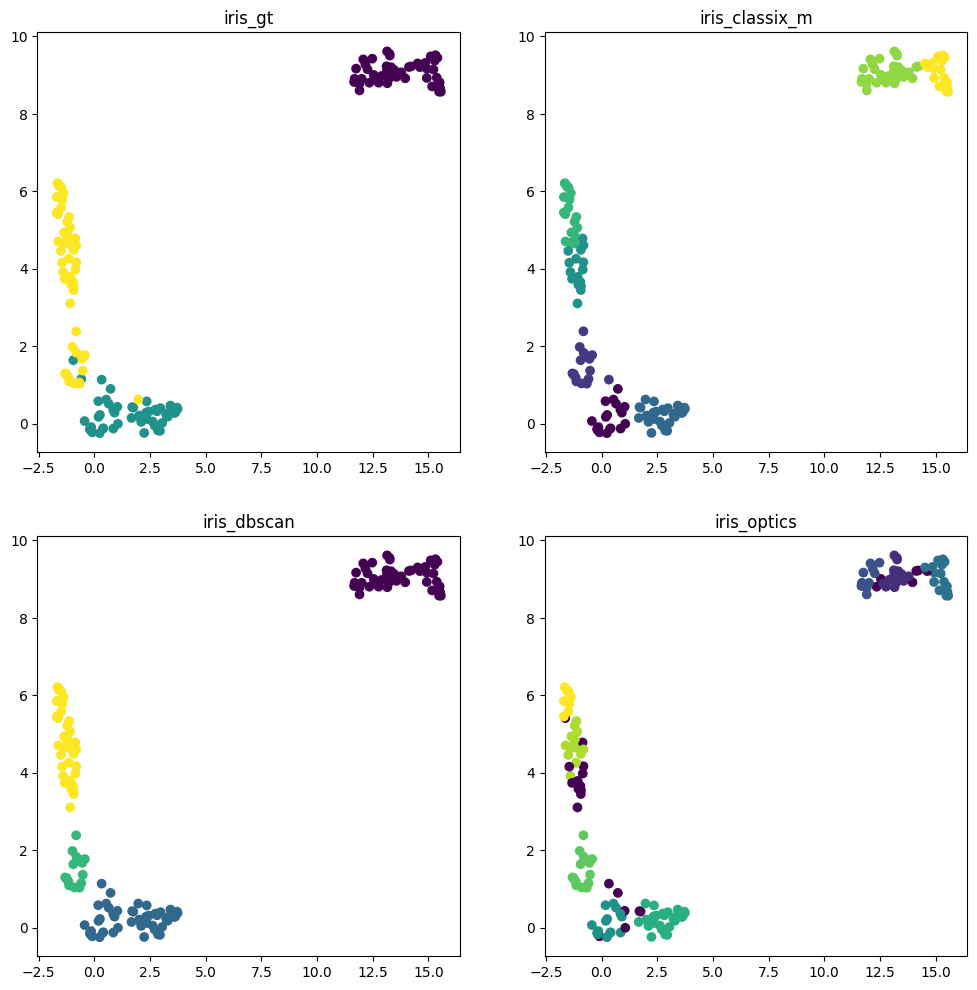

In [61]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(x[:, 0], x[:, 1], c=labels)
axes[0,0].set_title("iris_gt")
# axes[0,0].legend()
axes[0,1].scatter(x[:, 0], x[:, 1], c=clx_m.labels)
axes[0,1].set_title("iris_classix_m")
# axes[0,1].legend()
axes[1,0].scatter(x[:, 0], x[:, 1], c=db.labels_)
axes[1,0].set_title("iris_dbscan")
# axes[1,0].legend()
axes[1,1].scatter(x[:, 0], x[:, 1], c=op.labels_)
axes[1,1].set_title("iris_optics")
# axes[1,1].legend()
plt.savefig('iris_all.svg', format='svg', bbox_inches='tight', dpi=300)


<Figure size 640x480 with 0 Axes>